#Academic Integrity Statement

"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

In [ ]:
! pip install gym

In [ ]:
import numpy as np 
from gym import spaces 
import matplotlib.pyplot as plt


In [ ]:
grid = np.zeros((4,4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


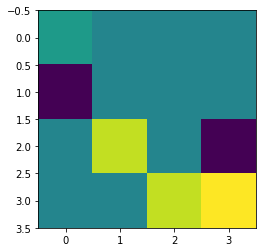

In [ ]:
pos1 = [0,0]
posr1 = [1,0]
posr2 = [2,3]
posb1 = [2,1]
posb2 = [3,2]
pos2 = [3,3]
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 6
grid[tuple(posr1)] = -5
grid[tuple(posr2)] = -5
grid[tuple(posb1)] = 5
grid[tuple(posb2)] = 5
plt.imshow(grid)

In [ ]:
class GridWorld_Env:
    def __init__(self) -> None:
      super().__init__()
      self.obs_space = spaces.Discrete(16)
      self.act_space = spaces.Discrete(4)
      self.max_tSteps = 20
    # reset the agent when an episode begins    
    def reset(self):
        self.tStep = 0
        self.agentPos = [0,0]
        self.finalPos = [3,3]
        self.posrock1 = [1,0]
        self.posrock2 = [2,3]
        self.posbatt1 = [2,1]
        self.posbatt2 = [3,2]
        pos= self.agentPos[0]*4+self.agentPos[1]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agentPos)] = 1
        self.state[tuple(self.finalPos)] = 6
        self.state[tuple(self.posrock1)] = -5
        self.state[tuple(self.posrock2)] = -5
        self.state[tuple(self.posbatt1)] = 5
        self.state[tuple(self.posbatt2)] = 5
        obs = self.state.flatten()
        return pos

    # Agent takes the step, i.e. take action to interact with 
      
    def step(self, action):
        if action == 0: #down
          self.agentPos[0] +=1
          if self.agentPos[0] == 4:
            self.agentPos[0] -=1
        elif action == 1: #up
          self.agentPos[0] -=1
          if self.agentPos[0] == -1:
            self.agentPos[0] +=1
        elif action == 2: #right
          self.agentPos[1] +=1
          if self.agentPos[1] == 4:
            self.agentPos[1] -=1
        else: #left
          self.agentPos[1] -=1
          if self.agentPos[1] == -1:
            self.agentPos[1] +=1
        self.agentPos = np.clip(self.agentPos,0,3)
        self.state = np.zeros((4,4))
        self.finalPos = [3,3]
        self.posrock1 = [1,0]
        self.posrock2 = [2,3]
        self.posbatt1 = [2,1]
        self.posbatt2 = [3,2]
        self.state[tuple(self.agentPos)] = 1
        self.state[tuple(self.finalPos)] = 6
        self.state[tuple(self.posrock1)] = -5
        self.state[tuple(self.posrock2)] = -5
        self.state[tuple(self.posbatt1)] = 5
        self.state[tuple(self.posbatt2)] = 5
        obs = self.state.flatten()
        reward = 0
        s_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        npos = s_table[tuple(self.agentPos)]
        flag1 = 0
        flag2 = 0
        if (self.agentPos == self.finalPos).all():
          reward += 6
        if (self.agentPos == self.posrock1).all():
          reward -=5
        if (self.agentPos == self.posrock2).all():
          reward -=5
        if (self.agentPos == self.posbatt1).all() and flag1 ==0:
          flag1 = 1
          reward +=5
        if (self.agentPos == self.posbatt2).all() and flag2 == 0:
          flag2 =1
          reward +=5
        self.tStep +=1
        done = True if (self.agentPos == self.finalPos).all() else False
        done = True if self.tStep>=self.max_tSteps else done
        return npos,reward,done
    def render(self):
      plt.imshow(self.state)


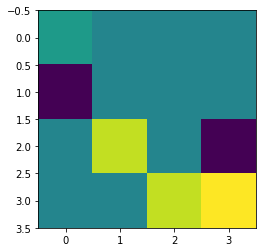

In [ ]:
grid_env = GridWorld_Env()
a = grid_env.reset()
grid_env.render()

In [ ]:
import  matplotlib.pyplot as plt

reward for action:   0
final reward:   0


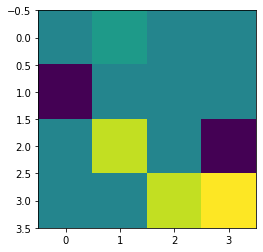

In [ ]:
action = 2
final_rew = 0
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


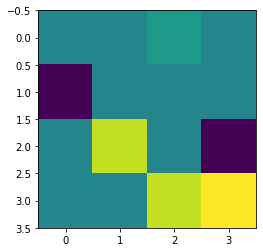

In [ ]:
action = 2
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


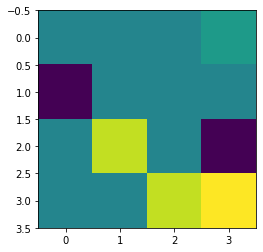

In [ ]:
action = 2
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


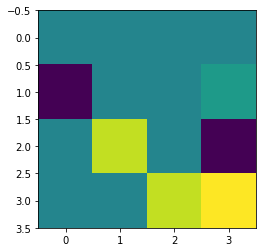

In [ ]:
action = 0
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


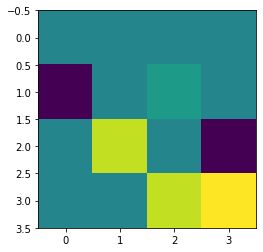

In [ ]:
action = 3
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   0


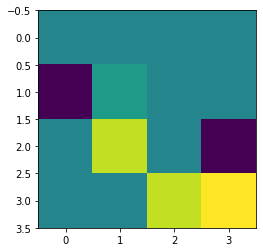

In [ ]:
action = 3
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   5
final reward:   5


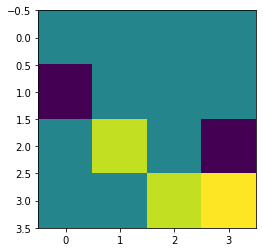

In [ ]:
action = 0
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   0
final reward:   5


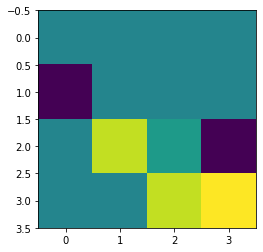

In [ ]:
action = 2
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   5
final reward:   10


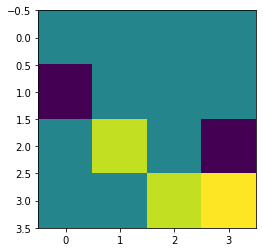

In [ ]:
action = 0
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

reward for action:   6
final reward:   16


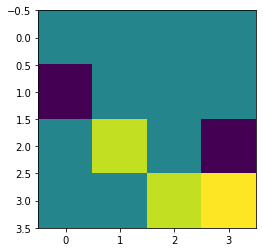

In [ ]:
action = 2
observation,reward,done = grid_env.step(action)
grid_env.render()
print("reward for action:  ",reward)
final_rew += reward 
print("final reward:  ",final_rew)

In [ ]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.obs_space = env.obs_space
    self.act_space = env.act_space

  def step(self, observation):
    return np.random.choice(self.act_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

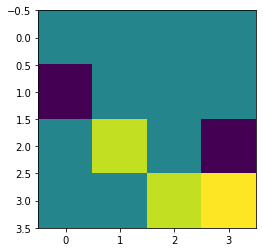

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import widgets
import time
env = GridWorld_Env()
agent = RandomAgent(env)
obs = env.reset()
done = False
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()
path = [2,2,2,0,3,3,0,2,2]
finalReward = 0
for i in path:
    action = agent.step(obs)
    action = i
    obs, reward, done = env.step(action)
    with output_grid.output_to(0, 0):
      output_grid.clear_cell()
      env.render()
    time.sleep(1)

SARSA Algorithm

""


Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: -5
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 5
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: -5
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: -5
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 5
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached

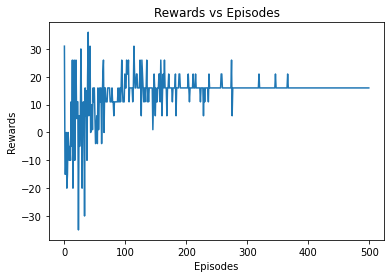

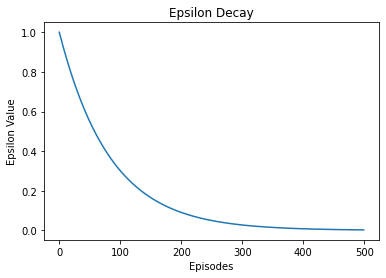

In [ ]:
#SARSA Algorithm
from matplotlib import figure

environment = GridWorld_Env()
q1Table = np.zeros([environment.obs_space.n, environment.act_space.n])
outputGrid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9
total_epochs=0
episodes=500
totalEpochs,totalRewards,totalEpsilon= [],[],[]
allEpochs = 0
totalPenalties = 0
def actionFunction(st):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = environment.act_space.sample()
    else:
        action = np.argmax(q1Table[st, :])
    return action

for i in range(episodes):
    initState = environment.reset()
    initAction = actionFunction(initState)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= environment.step(initAction)
        action2 = actionFunction(state2)          
        q1Table[initState, initAction] = q1Table[initState, initAction] + alpha * (reward + gamma * q1Table[state2, action2] - q1Table[initState, initAction])  
        initState = state2
        initAction = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):
          with outputGrid.output_to(0, 0):
            outputGrid.clear_cell()
    totalEpochs.append(epochs)
    if done:
      print(f"Reached at timestep: {env.tStep}")
      print(f"Reward: {reward}")
    totalRewards.append(r) 
    total_epochs += epochs
    totalPenalties += penalties
    epsilon= np.exp(-6*i/episodes)
    totalEpsilon.append(epsilon)  
    # environment.render()
plt.plot(totalRewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(totalEpsilon)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')        
print("Model Trained\n")
print("Total number of Episodes to complete training:",episodes)
print("Total number of Timesteps to complete training:",total_epochs)
print("Total Penalties incurred:", totalPenalties)
print("Timesteps per episode value:",{total_epochs / episodes})
print("SARSA Table Values:\n", q1Table)


""


Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Model Trained

Total number of Episodes to complete training: 10
Total number of Timesteps to complete training: 92
Total Penalties incurred: 0
Timesteps per episode value: {9.2}
SARSA Table Values:
 [[-1.69698718e+00  6.40734149e-02  7.18973579e+00  1.17572355e-02]
 [ 9.90944815e+00  2.39983614e-02  8.94909324e-03 -3.00174590e-02]
 [ 1.09941764e-01  4.65963712e-04  4.32891467e-05 -2.76469181e-04]
 [ 1.34315679e-04  9.41848362e-07  1.30252327e-05  2.00304654e-03]
 [ 1.84195163e-01 -2.41713985e-02 -3.25819952e-03 -9.74839635e-01]
 [ 1.24541077e+01  1.28928448e-01  5.92129646e-02 -1.09483303e+00]
 [ 1.37554021e+00  2.03303687e-03  2.43380253e-04  5.59966750e-02]
 

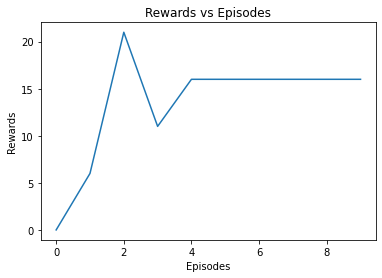

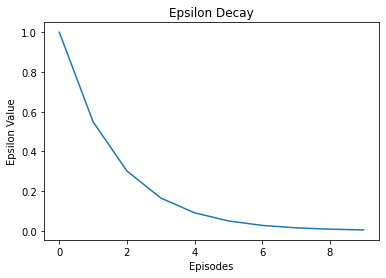

In [ ]:
#SARSA Algorithm evaluation
from matplotlib import figure

environment = GridWorld_Env()
outputGrid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9
total_epochs=0
episodes=10
totalEpochs,totalRewards,totalEpsilon= [],[],[]
allEpochs = 0
totalPenalties = 0
def actionFunction(st):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = environment.act_space.sample()
    else:
        action = np.argmax(q1Table[st, :])
    return action

for i in range(episodes):
    initState = environment.reset()
    initAction = actionFunction(initState)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= environment.step(initAction)
        action2 = actionFunction(state2)            
        initState = state2
        initAction = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):
          with outputGrid.output_to(0, 0):
            outputGrid.clear_cell()
    totalEpochs.append(epochs)
    if done:
      print(f"Reached at timestep: {env.tStep}")
      print(f"Reward: {reward}")
    totalRewards.append(r) 
    total_epochs += epochs
    totalPenalties += penalties
    epsilon= np.exp(-6*i/episodes)
    totalEpsilon.append(epsilon)  
plt.plot(totalRewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(totalEpsilon)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')        
print("Model Trained\n")
print("Total number of Episodes to complete training:",episodes)
print("Total number of Timesteps to complete training:",total_epochs)
print("Total Penalties incurred:", totalPenalties)
print("Timesteps per episode value:",{total_epochs / episodes})
print("SARSA Table Values:\n", q1Table)



Hyper parameter 1 -

gamma(discount factor)

gamma = 0.89

""


Reached at timestep: 6
Reward: 5
Reached at timestep: 6
Reward: -5
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 5
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached a

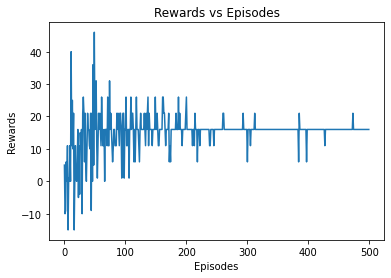

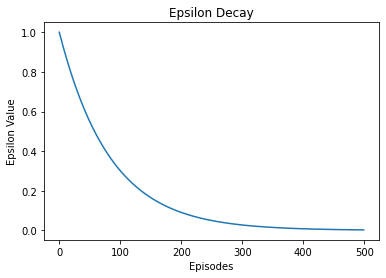

In [ ]:
#SARSA Algorithm
from matplotlib import figure
environment = GridWorld_Env()
q1Table = np.zeros([environment.obs_space.n, environment.act_space.n])
outputGrid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.89
epsilon = 0.9
total_epochs=0
episodes=500
totalEpochs,totalRewards,totalEpsilon= [],[],[]
allEpochs = 0
totalPenalties = 0
def actionFunction(st):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = environment.act_space.sample()
    else:
        action = np.argmax(q1Table[st, :])
    return action

for i in range(episodes):
    initState = environment.reset()
    initAction = actionFunction(initState)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= environment.step(initAction)
        action2 = actionFunction(state2)          
        q1Table[initState, initAction] = q1Table[initState, initAction] + alpha * (reward + gamma * q1Table[state2, action2] - q1Table[initState, initAction])  
        initState = state2
        initAction = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):
          with outputGrid.output_to(0, 0):
            outputGrid.clear_cell()
    totalEpochs.append(epochs)
    if done:
      print(f"Reached at timestep: {env.tStep}")
      print(f"Reward: {reward}")
    totalRewards.append(r) 
    total_epochs += epochs
    totalPenalties += penalties
    epsilon= np.exp(-6*i/episodes)
    totalEpsilon.append(epsilon)  
plt.plot(totalRewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(totalEpsilon)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')        
print("Model Trained\n")
print("Total number of Episodes to complete training:",episodes)
print("Total number of Timesteps to complete training:",total_epochs)
print("Total Penalties incurred:", totalPenalties)
print("Timesteps per episode value:",{total_epochs / episodes})
print("SARSA Table Values:\n", q1Table)


gamma = 0.79

""


Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: -5
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: -5
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 5
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached 

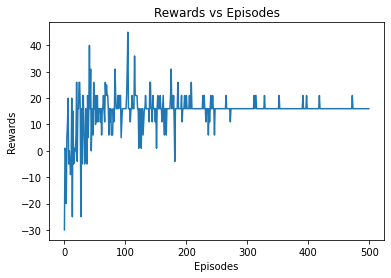

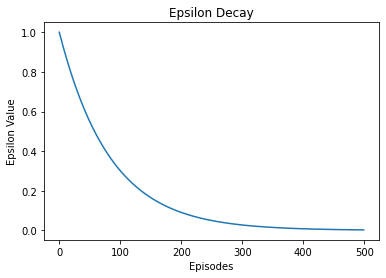

In [ ]:
#SARSA Algorithm
from matplotlib import figure

environment = GridWorld_Env()
q1Table = np.zeros([environment.obs_space.n, environment.act_space.n])
outputGrid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.79
epsilon = 0.9
total_epochs=0
episodes=500
totalEpochs,totalRewards,totalEpsilon= [],[],[]
allEpochs = 0
totalPenalties = 0
def actionFunction(st):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = environment.act_space.sample()
    else:
        action = np.argmax(q1Table[st, :])
    return action

for i in range(episodes):
    initState = environment.reset()
    initAction = actionFunction(initState)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= environment.step(initAction)
        action2 = actionFunction(state2)          
        q1Table[initState, initAction] = q1Table[initState, initAction] + alpha * (reward + gamma * q1Table[state2, action2] - q1Table[initState, initAction])  
        initState = state2
        initAction = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):
          with outputGrid.output_to(0, 0):
            outputGrid.clear_cell()
    totalEpochs.append(epochs)
    if done:
      print(f"Reached at timestep: {env.tStep}")
      print(f"Reward: {reward}")
    totalRewards.append(r) 
    total_epochs += epochs
    totalPenalties += penalties
    epsilon= np.exp(-6*i/episodes)
    totalEpsilon.append(epsilon)  
plt.plot(totalRewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(totalEpsilon)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')        
print("Model Trained\n")
print("Total number of Episodes to complete training:",episodes)
print("Total number of Timesteps to complete training:",total_epochs)
print("Total Penalties incurred:", totalPenalties)
print("Timesteps per episode value:",{total_epochs / episodes})
print("SARSA Table Values:\n", q1Table)


Gamma = 0.85

""


Model Trained

Total number of Episodes to complete training: 500
Total number of Timesteps to complete training: 4015
Total Penalties incurred: 0
Timesteps per episode value: {8.03}
SARSA Table Values:
 [[-1.69547141e+00  3.83983245e-03  4.87980096e+00 -2.03510837e-04]
 [ 7.41269589e+00  4.26122639e-02  1.07307106e-03  2.67976411e-02]
 [ 2.63683409e-02  1.48651435e-04  1.30308258e-07 -2.23613191e-04]
 [-4.11930346e-04 -3.44607042e-06 -3.48345378e-06  5.89712458e-05]
 [ 2.04924926e-01 -2.34177201e-02  3.52115950e-02 -5.70438886e-01]
 [ 1.03752453e+01  1.36962297e-01  1.19187111e-02 -1.11314525e+00]
 [ 3.68064895e-01 -1.32199655e-07 -8.04691193e-04  2.65857136e-02]
 [-1.95005348e-01 -3.43183009e-06  8.89622224e-06  2.24803152e-03]
 [ 1.37114404e-03 -3.86190605e-01  2.45840322e+00  1.04630357e-02]
 [ 7.62582145e+00  5.77759285e-01  1.63624716e-01  2.35762129e-01]
 [ 9.55263536e-01  4.77925241e-03 -5.55762796e-01  2.71624830e+00]
 [ 5.18896515e-01 -1.25277075e-03 -1.46001916e-01  3.390415

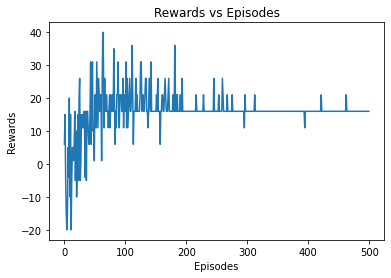

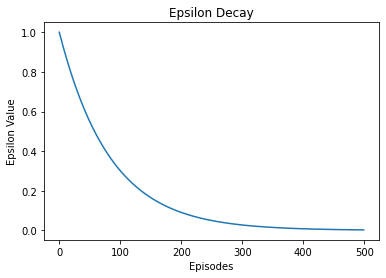

In [ ]:
#SARSA Algorithm
from matplotlib import figure

environment = GridWorld_Env()
q1Table = np.zeros([environment.obs_space.n, environment.act_space.n])
outputGrid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.85
epsilon = 0.9
total_epochs=0
episodes=500
totalEpochs,totalRewards,totalEpsilon= [],[],[]
allEpochs = 0
totalPenalties = 0
def actionFunction(st):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = environment.act_space.sample()
    else:
        action = np.argmax(q1Table[st, :])
    return action

for i in range(episodes):
    initState = environment.reset()
    initAction = actionFunction(initState)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= environment.step(initAction)
        action2 = actionFunction(state2)          
        q1Table[initState, initAction] = q1Table[initState, initAction] + alpha * (reward + gamma * q1Table[state2, action2] - q1Table[initState, initAction])  
        initState = state2
        initAction = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):
          with outputGrid.output_to(0, 0):
            outputGrid.clear_cell()
    totalEpochs.append(epochs)
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    #   print(f"Reward: {reward}")
    totalRewards.append(r) 
    total_epochs += epochs
    totalPenalties += penalties
    epsilon= np.exp(-6*i/episodes)
    totalEpsilon.append(epsilon)  
    # environment.render()
plt.plot(totalRewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(totalEpsilon)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')        
print("Model Trained\n")
print("Total number of Episodes to complete training:",episodes)
print("Total number of Timesteps to complete training:",total_epochs)
print("Total Penalties incurred:", totalPenalties)
print("Timesteps per episode value:",{total_epochs / episodes})
print("SARSA Table Values:\n", q1Table)


Hyper parameter 2 - Episodes

Episodes = 400

""


Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: -5
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: -5
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 6
Reached at timestep: 6
Reward: 0
Reached 

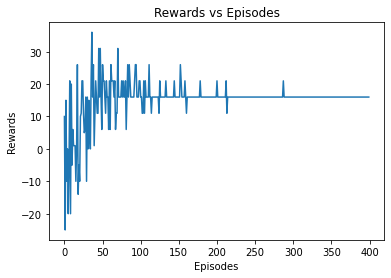

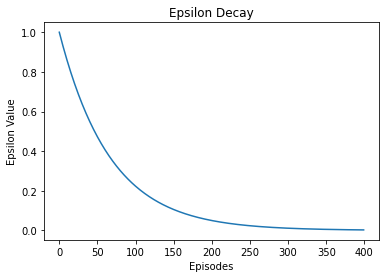

In [ ]:
#SARSA Algorithm
from matplotlib import figure

environment = GridWorld_Env()
q1Table = np.zeros([environment.obs_space.n, environment.act_space.n])
outputGrid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9
total_epochs=0
episodes=400
totalEpochs,totalRewards,totalEpsilon= [],[],[]
allEpochs = 0
totalPenalties = 0
def actionFunction(st):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = environment.act_space.sample()
    else:
        action = np.argmax(q1Table[st, :])
    return action

for i in range(episodes):
    initState = environment.reset()
    initAction = actionFunction(initState)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= environment.step(initAction)
        action2 = actionFunction(state2)          
        q1Table[initState, initAction] = q1Table[initState, initAction] + alpha * (reward + gamma * q1Table[state2, action2] - q1Table[initState, initAction])  
        initState = state2
        initAction = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):
          with outputGrid.output_to(0, 0):
            outputGrid.clear_cell()
    totalEpochs.append(epochs)
    if done:
      print(f"Reached at timestep: {env.tStep}")
      print(f"Reward: {reward}")
    totalRewards.append(r) 
    total_epochs += epochs
    totalPenalties += penalties
    epsilon= np.exp(-6*i/episodes)
    totalEpsilon.append(epsilon)  
    # environment.render()
plt.plot(totalRewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(totalEpsilon)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')        
print("Model Trained\n")
print("Total number of Episodes to complete training:",episodes)
print("Total number of Timesteps to complete training:",total_epochs)
print("Total Penalties incurred:", totalPenalties)
print("Timesteps per episode value:",{total_epochs / episodes})
print("SARSA Table Values:\n", q1Table)


Hyper parameter - 2

Episodes = 450

""


Model Trained

Total number of Episodes to complete training: 450
Total number of Timesteps to complete training: 3621
Total Penalties incurred: 0
Timesteps per episode value: {8.046666666666667}
SARSA Table Values:
 [[-1.76716060e+00  2.82616696e-02  6.58323188e+00  1.07687736e-03]
 [ 9.29825359e+00  1.69570576e-01  8.79840988e-04  8.71928934e-02]
 [ 3.23286386e-02  3.36071167e-06 -1.23196067e-04 -1.18684594e-04]
 [-5.09982465e-03 -3.22569970e-05 -4.94810831e-06 -1.93541675e-06]
 [-2.41391013e-03 -2.60327766e-02  9.18146929e-01 -4.79064535e-01]
 [ 1.18722470e+01  7.61685344e-02  4.01886211e-02 -1.31229422e+00]
 [-6.10193775e-03  1.36700853e-04 -4.64126409e-03  8.11495254e-01]
 [-3.85192961e-01 -5.19654991e-05 -7.13619329e-09  4.50205748e-03]
 [ 5.65718259e-04 -6.12599735e-01  1.02105859e+00 -1.36806285e-03]
 [ 8.24365056e-02  3.30417554e-01  8.90492681e+00  4.77368201e-02]
 [ 1.02899454e+01  1.28943103e-02 -8.71210698e-01  8.40204147e-01]
 [ 9.92917431e-01 -3.26221279e-03 -5.00192538e

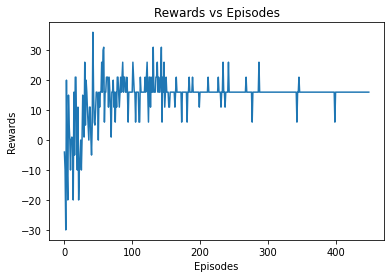

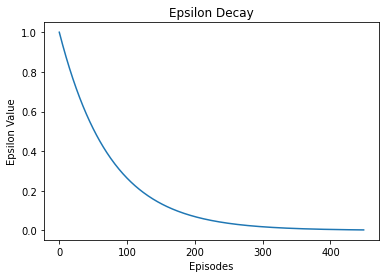

In [ ]:
#SARSA Algorithm
from matplotlib import figure

environment = GridWorld_Env()
q1Table = np.zeros([environment.obs_space.n, environment.act_space.n])
outputGrid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9
total_epochs=0
episodes=450
totalEpochs,totalRewards,totalEpsilon= [],[],[]
allEpochs = 0
totalPenalties = 0
def actionFunction(st):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = environment.act_space.sample()
    else:
        action = np.argmax(q1Table[st, :])
    return action

for i in range(episodes):
    initState = environment.reset()
    initAction = actionFunction(initState)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= environment.step(initAction)
        action2 = actionFunction(state2)          
        q1Table[initState, initAction] = q1Table[initState, initAction] + alpha * (reward + gamma * q1Table[state2, action2] - q1Table[initState, initAction])  
        initState = state2
        initAction = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):
          with outputGrid.output_to(0, 0):
            outputGrid.clear_cell()
    totalEpochs.append(epochs)
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    #   print(f"Reward: {reward}")
    totalRewards.append(r) 
    total_epochs += epochs
    totalPenalties += penalties
    epsilon= np.exp(-6*i/episodes)
    totalEpsilon.append(epsilon)  
    # environment.render()
plt.plot(totalRewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(totalEpsilon)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')        
print("Model Trained\n")
print("Total number of Episodes to complete training:",episodes)
print("Total number of Timesteps to complete training:",total_epochs)
print("Total Penalties incurred:", totalPenalties)
print("Timesteps per episode value:",{total_epochs / episodes})
print("SARSA Table Values:\n", q1Table)


Episodes = 300

""


Model Trained

Total number of Episodes to complete training: 300
Total number of Timesteps to complete training: 2330
Total Penalties incurred: 0
Timesteps per episode value: {7.766666666666667}
SARSA Table Values:
 [[-1.29899031e+00 -1.29984839e-02  3.20814904e+00 -2.65625237e-02]
 [ 5.64568281e+00  6.49165220e-02  3.03125207e-05  1.10479636e-02]
 [ 2.50655355e-03  1.46044550e-06  6.34666667e-09  6.28472324e-03]
 [-4.80298480e-06 -9.60596010e-08  0.00000000e+00  1.17235396e-05]
 [ 1.01821403e-01 -1.15503619e-02  1.42271946e-02 -3.89004308e-01]
 [ 8.60764260e+00  2.07091547e-02  2.78183932e-03 -6.99582174e-01]
 [ 1.24477451e-01  3.49152476e-06  2.01084806e-06  3.18014544e-03]
 [-9.95000000e-02  2.32597573e-09 -4.90000995e-04  5.71462980e-04]
 [ 1.65926735e-03 -4.37028733e-01  1.33217158e+00  1.40315462e-02]
 [ 6.59744427e+00  2.42816821e-01  1.00414744e-01  2.81451126e-02]
 [ 2.09340789e+00  6.74256712e-04 -1.94085471e-01  2.92962053e-01]
 [ 1.78206000e-01  0.00000000e+00 -5.00000000e

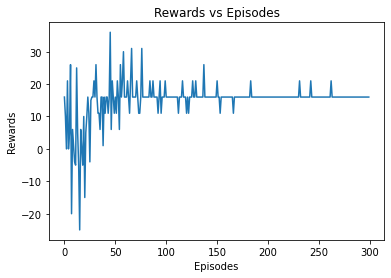

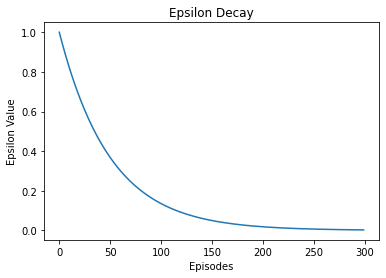

In [ ]:
#SARSA Algorithm
from matplotlib import figure

environment = GridWorld_Env()
q1Table = np.zeros([environment.obs_space.n, environment.act_space.n])
outputGrid = widgets.Grid(1, 1)
alpha = 0.01
gamma = 0.99
epsilon = 0.9
total_epochs=0
episodes=300
totalEpochs,totalRewards,totalEpsilon= [],[],[]
allEpochs = 0
totalPenalties = 0
def actionFunction(st):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = environment.act_space.sample()
    else:
        action = np.argmax(q1Table[st, :])
    return action

for i in range(episodes):
    initState = environment.reset()
    initAction = actionFunction(initState)
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False    
    while not done:
        state2, reward, done= environment.step(initAction)
        action2 = actionFunction(state2)          
        q1Table[initState, initAction] = q1Table[initState, initAction] + alpha * (reward + gamma * q1Table[state2, action2] - q1Table[initState, initAction])  
        initState = state2
        initAction = action2
        if reward == -1:
            penalties += 1
        epochs += 1
        r+=reward
        if(i>998):
          with outputGrid.output_to(0, 0):
            outputGrid.clear_cell()
    totalEpochs.append(epochs)
    # if done:
    #   print(f"Reached at timestep: {env.tStep}")
    #   print(f"Reward: {reward}")
    totalRewards.append(r) 
    total_epochs += epochs
    totalPenalties += penalties
    epsilon= np.exp(-6*i/episodes)
    totalEpsilon.append(epsilon)  
    # environment.render()
plt.plot(totalRewards)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(totalEpsilon)  
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Value')        
print("Model Trained\n")
print("Total number of Episodes to complete training:",episodes)
print("Total number of Timesteps to complete training:",total_epochs)
print("Total Penalties incurred:", totalPenalties)
print("Timesteps per episode value:",{total_epochs / episodes})
print("SARSA Table Values:\n", q1Table)
